___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Topic Modeling Assessment Project

#### Task: Import pandas and read in the quora_questions.csv file.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [19]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('popular', quiet=True) # for downloading packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
quora = pd.read_csv('/content/drive/MyDrive/Compétition Zindi/quora_questions.csv')

In [21]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [22]:
tokens = []
for i in range(quora.shape[0]):
  tokens +=  nltk.word_tokenize(quora["Question"][i])


In [23]:
stopwords_liste = stopwords.words('english')

In [24]:
#retrait des stopwords,ponctuations
tokens_sans_stopwords=[word for word in tokens if not word in stopwords_liste ]
tokens_sans_stopwords = [word for word in tokens_sans_stopwords if word.isalpha()] #enlever ponctuation

In [25]:
freq= nltk.FreqDist(tokens_sans_stopwords)
top50=freq.most_common(50)
filter_words = dict([(m, n) for m, n in top50])

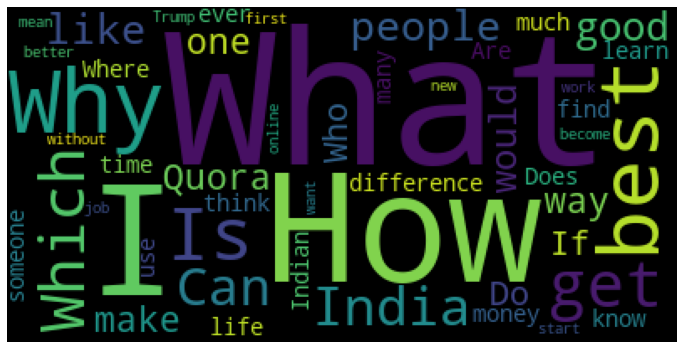

In [26]:
wcloud = WordCloud().generate_from_frequencies(filter_words)
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(wcloud)
plt.axis("off")
plt.show()

# Preprocessing

#### Task: Use TF-IDF Vectorization to create a vectorized document term matrix. You may want to explore the max_df and min_df parameters.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
dtm = tfidf.fit_transform(quora['Question'])

In [ ]:
dtm

<404289x38669 sparse matrix of type '<class 'numpy.float64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

# Non-negative Matrix Factorization

#### TASK: Using Scikit-Learn create an instance of NMF with 20 expected components. (Use random_state=42)..

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=20,random_state=42)

In [ ]:
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

#### TASK: Print our the top 15 most common words for each of the 20 topics.

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['thing', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'laptop', 'movie', 'ways', '2016', 'books', 'book', 'movies', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['majors', 'recruit', 'sex', 'looking', 'differ', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['add', 'answered', 'needing', 'post', 'easily', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['using', 'website', 'investment', 'friends', 'black', 'internet', 'free', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #4
['balance', 'earth', 'day', 'death', 'changed', 'live', 'want', 'change', 'moment', 'real', 'important', 'thing', 'meaning', 'purpose', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['reservation', 'engineering', 'minister', 'president', 'company', 'china', 'business', 'country', 

#### TASK: Add a new column to the original quora dataframe that labels each question into one of the 20 topic categories.

In [ ]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [ ]:
topic_results = nmf_model.transform(dtm)

In [ ]:
topic_results.argmax(axis=1)

quora['Topic'] = topic_results.argmax(axis=1)

quora.head(10)

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14
5,Astrology: I am a Capricorn Sun Cap moon and c...,1
6,Should I buy tiago?,0
7,How can I be a good geologist?,10
8,When do you use シ instead of し?,19
9,Motorola (company): Can I hack my Charter Moto...,17


# Great job!